# Analysis of GCamp6f data from retrograde LGN-retina labelling - explore

## TODO:


## Qs


## Setup

In [31]:
# Setup
import os # directory lib
import h5py # HDF5 lib
import numpy as np # linear alg lib
import matplotlib.pyplot as plt # plotting lib
import seaborn as sns # nice plotting lib
from pylab import rcParams
import warnings
import matplotlib.gridspec as gridspec

In [32]:
# matplotlib inline is a jupyter requirement for plotting
%matplotlib inline

In [33]:
### Parameter setup (dictionary 'p')
# Directory setup

p = {}
p.update({
    'dir': "/Volumes/busse_lab/users/yannik/data_YB/2P/miro_RGC/20160223/02/Pre/",
    'file': "Chirps.h5"
#     'dir': "/Volumes/busse_lab/users/yannik/data_YB/2P/miro_RGC/20160223/02/Pre/Chirps.h5",
    })
print(p)

os.chdir(p['dir'])
print(os.getcwd()) # get current working dir
files = os.listdir() # print list of cwd contents
print(files)

{'dir': '/Volumes/busse_lab/users/yannik/data_YB/2P/miro_RGC/20160223/02/Pre/', 'file': 'Chirps.h5'}
/Volumes/busse_lab/users/yannik/data_YB/2P/miro_RGC/20160223/02/Pre
['NoiseGC', 'BG', 'F02.ini', 'Chirps.h5', 'Chirps', 'NoiseGC.h5', 'gcamp6Means', '._F02.ini', 'gcamp6Means.h5', 'BG.h5']


In [34]:
# check for files in dir
[file for file in os.listdir() if 'chirp' in file.lower()]



['Chirps.h5', 'Chirps']

## Loading 

In [35]:
### Load data
with h5py.File(p['dir']+p['file'], 'r') as f: # with command for var assignment and automatic closing
#     print(hf)
#     print(list(f['20160223'].keys()))
#     hdf['20160223'].create_dataset('foo', data=foo)
#     data = f.get('dataset_1')
#     np_data = np.array(data)
#     print('Shape of array', np_data.shape)
    data = {key:f[key][:] for key in list(f.keys())} # dictionary comprehension    

In [36]:
### Explore data
# data.keys() # data structures in this HDF5

# Get raw traces
tracesRaw = data['Traces0_raw'] # raw traces extraced from ROIs, preprocessed but not normalized
print(tracesRaw.shape) # time x ROI

# Get time stamps
tracetimes = data['Tracetimes0']
print(tracetimes.shape) # time x ROI

(1335, 13)
(1335, 13)


## Processing

### Traces

In [37]:
# Define normalization function
def norm(narray,mode='z'):
    if mode is 'z': # z-normalization
        return (narray - np.mean(narray, axis=0)) / np.std(narray, axis=0)
    
    elif mode is 'r': # range-normalization
        return (narray - np.min(narray, axis=0)) / (np.max(narray, axis=0) - np.min(narray, axis=0))
    
    else:
        warnings.warn("Mode parameter not recognised")

In [61]:
# Normalize traces
tracesZNorm = norm(tracesRaw)
tracesZNorm.shape

(1335, 13)

### Check effect of trace normalization
 - note: traces contains multiple cells (here: 13)

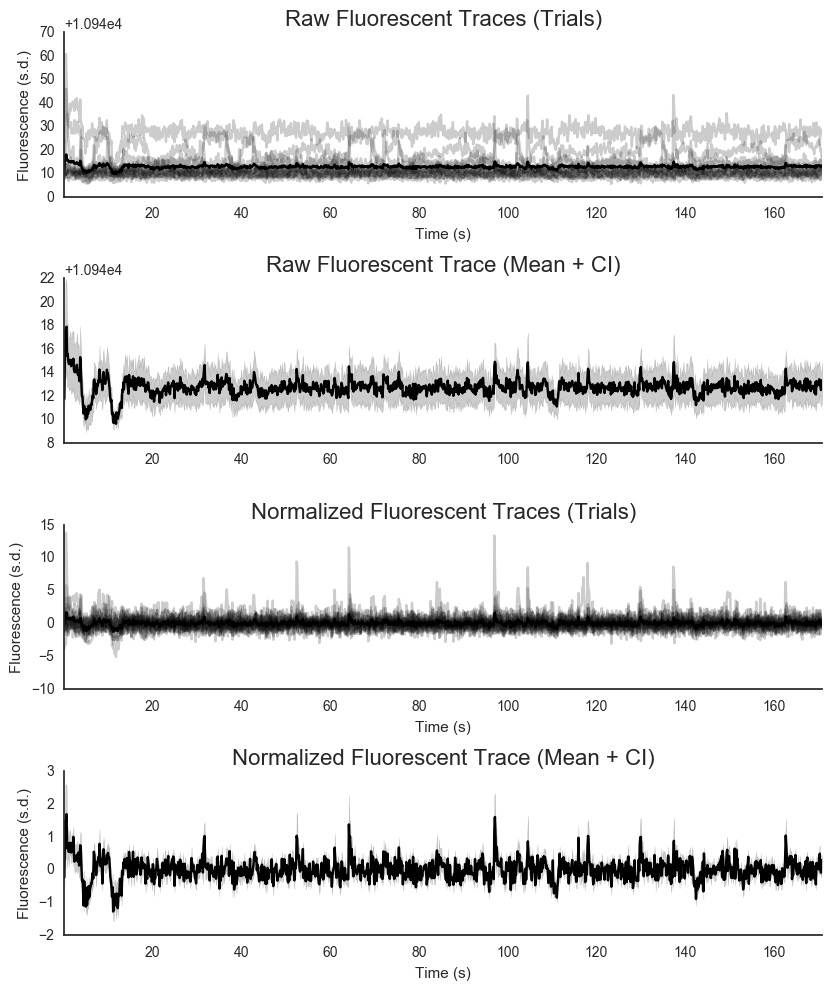

In [53]:
# Plot trace time-series
# raw traces, z-normalized, all ROIs, all trials concatenated

# Figure setup
p.update({
    'plt_start':0,
    'plt_stop':tracesRaw.shape[0],
}) # Include array length for plotting

# fig = plt.figure
rcParams['figure.figsize'] = 16,10
gs = gridspec.GridSpec(4, 1, width_ratios=[1,1]) # Generate 2x1 grid for plotting figures

## Raw traces
# Plot Raw trials
# use Tracetimes0 to correct time scaling
plt.subplot(gs[0, 0]).set_title('Raw Fluorescent Traces (Trials)', fontsize=16) # Set figure title
sns.tsplot(tracesRaw[p['plt_start']:p['plt_stop'],:].T,
           time = tracetimes[p['plt_start']:p['plt_stop'],0].T,
           color = 'k',err_style='unit_traces') # Note: transpose array

# Figure setup
sns.plt.gca().set(
    xlabel = 'Time (s)', # info: comments can be put in line here
    ylabel = 'Fluorescence (s.d.)',
) # axis labels
sns.set_style("white") # Remove background grid (sets for all plots)
sns.despine(top = True, right = True) # Remove unwanted axis borders

# Plot Raw mean
plt.subplot(gs[1, 0]).set_title('Raw Fluorescent Trace (Mean + CI)', fontsize=16) # Set figure title
sns.tsplot(tracesRaw[p['plt_start']:p['plt_stop'],:].T,
           time = tracetimes[p['plt_start']:p['plt_stop'],0].T,
           color = 'k') # Note: transpose array

## Normalized traces
# Plot trials
# use Tracetimes0 to correct time scaling
plt.subplot(gs[2, 0]).set_title('Normalized Fluorescent Traces (Trials)', fontsize=16) # Set figure title
sns.tsplot(tracesZNorm[p['plt_start']:p['plt_stop'],:].T,
           time = tracetimes[p['plt_start']:p['plt_stop'],0].T,
           color = 'k',err_style='unit_traces') # Note: transpose array

# Figure setup
sns.plt.gca().set(
    xlabel = 'Time (s)', # info: comments can be put in line here
    ylabel = 'Fluorescence (s.d.)',
) # axis labels
sns.set_style("white") # Remove background grid (sets for all plots)
sns.despine(top = True, right = True) # Remove unwanted axis borders

# Plot mean
plt.subplot(gs[3, 0]).set_title('Normalized Fluorescent Trace (Mean + CI)', fontsize=16) # Set figure title
sns.tsplot(tracesZNorm[p['plt_start']:p['plt_stop'],:].T,
           time = tracetimes[p['plt_start']:p['plt_stop'],0].T,
           color = 'k') # Note: transpose array

# Figure setup
sns.plt.gca().set(
    xlabel = 'Time (s)', # info: comments can be put in line here
    ylabel = 'Fluorescence (s.d.)',
) # axis labels
sns.despine(top = True, right = True) # Remove unwanted axis borders
plt.tight_layout() # Adjust subplot spacing

(1335, 13)

### Trial-wise traces

In [55]:
# Snippets = time series traces for each ROI, each trial
snippets = data['Snippets0']
snippets.shape # time x trial x ROI

(16390, 5, 13)

### Check if snippets are normalized
- positive

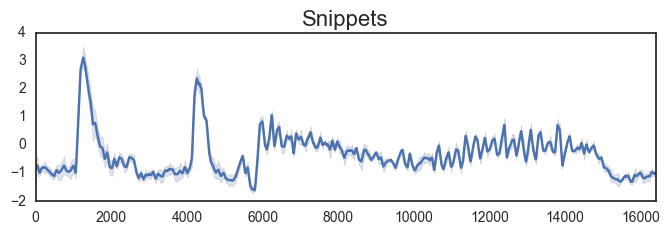

In [60]:
# Pick ROI
roi = 3

# Fig params
rcParams['figure.figsize'] = 16,10
gs = gridspec.GridSpec(4, 1, width_ratios=[1,1]) # Generate 2x1 grid for plotting figures

## Raw traces
# Plot Raw trials
# use Tracetimes0 to correct time scaling
plt.subplot(gs[0, 0]).set_title('Snippets', fontsize=16) # Set figure title
sns.tsplot(snippets[:,:, roi].T)
#            time = tracetimes[p['plt_start']:p['plt_stop'],0].T,
#            color = 'k',err_style='unit_traces') # Note: transpose array

### Response heat maps + ROIs

####  Response heat maps

In [15]:
# Get heat map data
meanImg = np.mean(data['wDataCh0'],axis=-1)
stdImg = np.std(data['wDataCh0'],axis=-1)

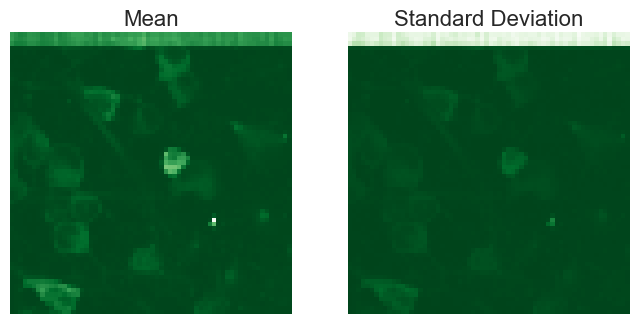

In [20]:
### Plot heat maps
# Note: dynamic range clipping done automatically by sns
hmapP = {'cbar':False,'xticklabels':False,'yticklabels':False,'square':True,'cmap':'Greens_r'} # Config for multi use

# Fig params
rcParams['figure.figsize'] = 8,5
gs = gridspec.GridSpec(1, 2)

# Plot mean heatmap
plt.subplot(gs[0, 0]).set_title('Mean', fontsize=16)
sns.heatmap(meanImg,**hmapP)

# Plot std heatmap
plt.subplot(gs[0, 1]).set_title('Standard Deviation', fontsize=16)
sns.heatmap(stdImg,**hmapP)

#### ROIs

In [32]:
# Extract ROIs
ROIs = data['ROIs']
np.unique(data['ROIs'])

# Make ROI matrix 'RGBA'
ROIDims = ROIs.shape
RGBA = np.zeros((ROIDims[0],ROIDims[1],4)) # dim: x X y X RGBA
# RGBA[:,:,:] = (0,0,0,1) # Set all pixels to black
# RGBA[ROIs == 1,:] = (0,0,0,0) # Set ROIs to transparent

# Make colour vector for each ROI
colours = np.random.rand(4,len(np.unique(ROIs))-1) # Populate w random numbers: RGBA x nROIs
colours[-1,:] = 1 # Set alpha to 1

# Set ROIs in 'RGBA' to random colour given by 'colours'
for itx,roi in enumerate(np.unique(ROIs)): # itx,roi allows to both get loop-number and content indices give by enumerate()
    if roi != 1:
        RGBA[ROIs == roi,:] = colours[:,itx]            

In [33]:
dir(RGBA)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__r

In [34]:
### Prepare heatmaps for insertion into 'RGBA'
# Clip image cRange to 90th/10th percentiles
meanImg[meanImg >= np.percentile(meanImg,90)] = np.percentile(meanImg,90)
meanImg[meanImg <= np.percentile(meanImg,10)] = np.percentile(meanImg,10)
stdImg[meanImg >= np.percentile(stdImg,90)] = np.percentile(stdImg,90)
stdImg[meanImg <= np.percentile(stdImg,10)] = np.percentile(stdImg,10)

# Normalize images
meanImg -= np.min(meanImg)
meanImg /= np.max(meanImg)
stdImg -= np.min(stdImg)
stdImg /= np.max(stdImg)

In [37]:
# Set non-ROI region in 'RGBA' to mean and std heat map

RGBA[:,:,-1] = 1 # Assign alpha values to 1 (neg nums count elements from right, '-1' indexes last element)

# meanRGBA = RGBA[:]
# stdRGBA = RGBA[:]

RGBA[ROIs == 1,1] = meanImg[ROIs == 1] # Mean image to 2nd channel (G) for non-ROI pixels
# stdRGBA[ROIs == 1,1] = stdImg[ROIs == 1] # Mean image to 2nd channel (G) for non-ROI pixels

# RGBA[ROIs != 1,1] = 0 # Set other channels to zero


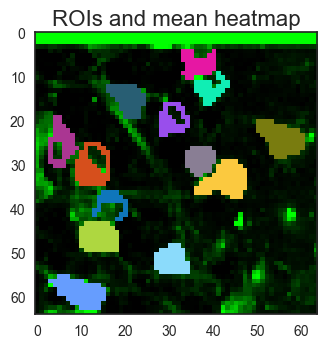

In [39]:
### Plot heat map + ROIs

# Fig params
rcParams['figure.figsize'] = 8,8 # Set image dimensions
gs = gridspec.GridSpec(1, 2)
# sns.plt.title('ROI Mask',fontsize=16)

# Plot mean heatmap
plt.subplot(gs[0, 0]).set_title('ROIs and mean heatmap', fontsize=16)
plt.imshow(meanRGBA, interpolation="nearest") # Set interpolation to k-nearest to avoid blurring

# Plot std heatmap
# plt.subplot(gs[0, 1]).set_title('Standard Deviation', fontsize=16)
# plt.imshow(stdRGBA, interpolation="nearest") # Set interpolation to k-nearest to avoid blurring

# # Hide axes
# plt.gca().get_xaxis().set_visible(False)
# plt.gca().get_yaxis().set_visible(False)


### Qs
How to insert 2nd plot for std?

## Plot combined trace time series + ROI on image heatmap

In [ ]:
# # Extract ROIs
# ROIs = data['ROIs']
# print(data['ROIs'])
# np.unique(data['ROIs'])

In [ ]:
# # Get and normalize mean heatmap images
# meanImg = np.mean(data['wDataCh0'],axis=-1) # Why axis=-1?
# stdImg = np.std(data['wDataCh0'],axis=-1)

# meanImg -= np.min(meanImg) # short-hand for alebraic manipulation
# meanImg /= np.max(meanImg)

In [40]:
# Params
iROI = 3 # Specify ROI to plot (make loop later)
# iTrial = 1 # Specify trial

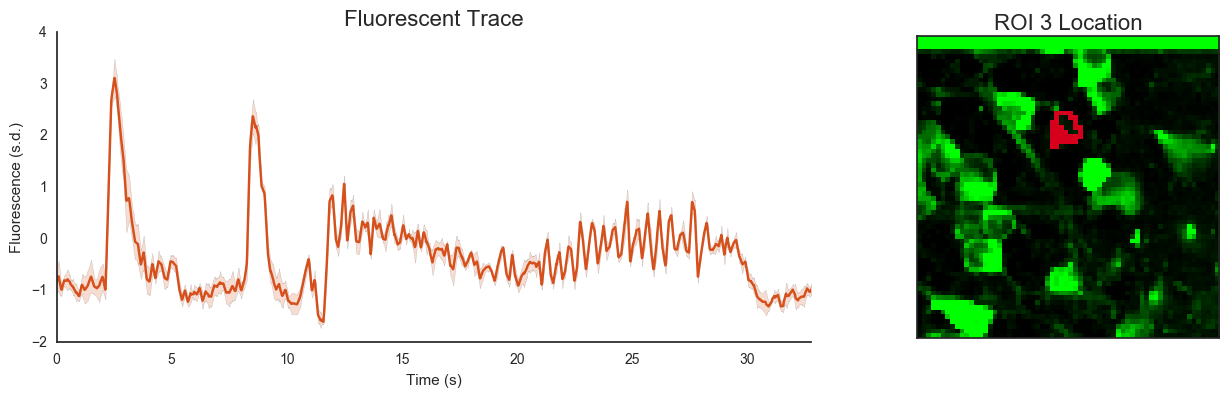

In [41]:
### Plot Time Series

# Generate timepoints
p.update({'plt_stop':snippets.shape[0]}) # update time vector
ts = data['SnippetsTimes0'][p['plt_start']:p['plt_stop'],0,iROI].T # Note: picking randomly trial '0' for time vector; 
# info: you can sub-reference data like above
ts = ts - np.min(ts)

# Fig params
rcParams['figure.figsize'] = 15,4
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5,1]) # Generate grid for plotting figures

# Plot time series plot
#   Use Tracetimes0 to correct time scaling
sns.plt.subplot(gs[0, 0]).set_title('Fluorescent Trace', fontsize=16) # Set figure title
sns.tsplot(snippets[p['plt_start']:p['plt_stop'],:,iROI].T,
           time=ts, 
           color=colours[:3,iROI])

# Figure setup
sns.plt.gca().set(xlabel='Time (s)', ylabel='Fluorescence (s.d.)') # Set axis labels
sns.set_style("white") # Remove background grid
sns.despine(top=True,right=True) # Remove unwanted axis borders
# rcParams['figure.figsize'] = 10,3

### Plot corresponding ROI + heatmap

RGBA = np.zeros((ROIDims[0],ROIDims[1],4)) # Reset RGBA to empty
# colours = np.random.rand(4,len(np.unique(ROIs))-1) # Populate w random numbers: RGBA x nROIs
RGBA[ROIs == -iROI,:] = colours[:,iROI] # Assign colours to ROIs (use neg idx due to lab-convention where ROIs are neg)
RGBA[ROIs != -iROI,1] = meanImg[ROIs != -iROI] # Mean image to 2nd channel (G) for non-ROI pixels
RGBA[ROIs == -iROI,1] = 0 # Set other channels to zero
RGBA[:,:,-1] = 1 # Assign all alpha values to 1

# Plot
plt.subplot(gs[0, 1]).set_title('ROI {0} Location'.format(iROI), fontsize=16)
plt.imshow(RGBA, interpolation="nearest")

# Fig params
plt.gca().get_xaxis().set_visible(False) # Hide axes
plt.gca().get_yaxis().set_visible(False)

## Testing Playground